In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Ecommerce_Customers.csv")

In [3]:
df.head(3)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


Lets select some features that we want to use for regression.



In [4]:
cdf = df[["Avg Session Length", "Time on App", 
               "Time on Website",'Length of Membership',"Yearly Amount Spent"]]
cdf.head(3)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


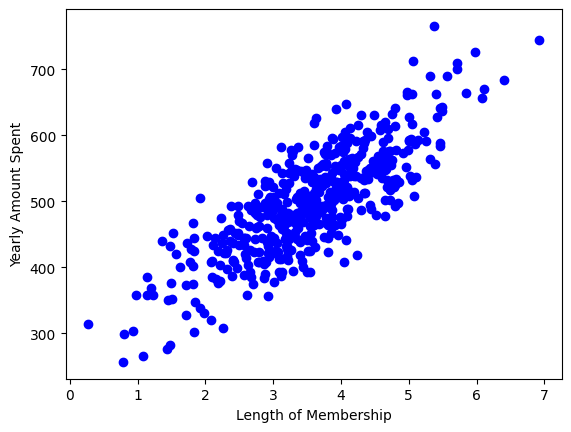

In [5]:
plt.scatter(cdf[["Length of Membership"]], cdf[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

In [6]:
inputCols=["Avg Session Length", "Time on App", "Time on Website",'Length of Membership']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[inputCols],df['Yearly Amount Spent'], test_size=0.2, random_state=3)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
print(y_pred)

[534.18635266 372.06333082 486.99120186 545.46924141 464.12925337
 648.82288736 479.34566081 485.16898781 554.96733751 457.7060809
 417.08994631 662.65407289 559.46433915 532.47679817 497.461501
 505.07593044 584.11681133 469.19211226 442.86378638 473.33903366
 753.19533045 520.67185158 502.17823421 494.88575334 542.37865048
 457.58717777 573.04172593 404.80719285 494.30664389 574.6023522
 435.74174401 508.04230208 399.09839741 512.39409414 357.29739624
 543.38752744 469.0265531  280.0493315  540.95039549 461.12055502
 441.64887932 401.75816142 456.25008947 563.7387732  652.13241837
 478.55856387 518.53733567 411.96565628 481.50502448 460.55024303
 425.01461241 337.3254851  473.11744587 473.16649477 489.24658817
 395.81592515 456.67532728 387.59582241 325.50061045 528.36194611
 438.06301032 460.76485311 531.78883616 501.08833764 443.23367458
 391.98414523 564.54357306 543.30895937 482.65595939 535.05631783
 425.29061883 424.60837543 408.99864427 553.42761435 502.00637253
 340.14407134 

In [10]:
slope = model.coef_[0]
y_intercept = model.intercept_

print("Slope:", slope)
print("Y-intercept:", y_intercept)

Slope: 25.878612416786165
Y-intercept: -1051.226271062236


In [ ]:
# Create a scatter plot with regression line for Length of Membership vs Yearly Amount Spent
plt.figure(figsize=(10, 6))

# Scatter plot of test data
plt.scatter(X_test["Length of Membership"], y_test, color='blue', alpha=0.7, label='Test Data')

# Create x values for the line
x_line = np.linspace(X_test["Length of Membership"].min(), X_test["Length of Membership"].max(), 100)

# Generate predictions using the model (holding other features at their mean values)
X_plot = pd.DataFrame({
    "Avg Session Length": [X_test["Avg Session Length"].mean()] * len(x_line),
    "Time on App": [X_test["Time on App"].mean()] * len(x_line),
    "Time on Website": [X_test["Time on Website"].mean()] * len(x_line),
    "Length of Membership": x_line
})
y_plot = model.predict(X_plot)

# Plot the regression line
plt.plot(x_line, y_plot, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Regression Model: Effect of Length of Membership on Yearly Amount Spent')
plt.legend()

# Calculate the coefficient for Length of Membership
membership_coef = model.coef_[3]

# Annotate with slope and intercept
plt.annotate(f'Slope (Membership coefficient): {membership_coef:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
             
plt.annotate(f'Intercept: {y_intercept:.2f}', 
             xy=(0.05, 0.88), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()